## Machine Learning 실습

### 타이타닉 탑승객 생존 예측 Classification with Python

## 1. 데이터 불러오기

In [58]:

import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%config Completer.use_jedi = False
! pip install seaborn

In [59]:
df= pd.read_csv('03Titanic_dataset.csv')
df.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 2.데이터 확인하기

In [60]:
print(df.info())
print('==='* 30)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   gender     1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    2

## 3. 빠진 값 확인

In [61]:
# 3. 빠진 값 확인
df.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## 4. 사용하지 않을 feature 제거

In [62]:
df = df.drop(['name','ticket','boat','cabin','body','home.dest'],axis=1)

## 5. Impute - Fare

In [63]:
df[df['fare'].isnull()]

,pclass,survived,gender,age,sibsp,parch,fare,embarked
1225,3,0,male,60.5,0,0,NaN,S


위에서는 전체 feature의 null 값을 sum 하여 summary로 보았다면, 결측치를 변형하기 전에 그 특정 feature을 
따로 선택하여 보는 것이 필요하다. 예를들어 fare 은 결측치가 하나 인걸 확인 할 수있고
그에 따른 row에서 상황 판단을 할 수 있다. 

In [65]:
df.loc[(df.fare.isnull()&(df.pclass==3),'fare')] = df.fare[df.pclass == 3].mean()

In [66]:
df.isnull().sum()

pclass        0
survived      0
gender        0
age         263
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

## 6. Impute - Age


In [67]:
df[df['age'].isnull()]

,pclass,survived,gender,age,sibsp,parch,fare,embarked
15,1,0,male,NaN,0,0,25.9250,S
37,1,1,male,NaN,0,0,26.5500,S
40,1,0,male,NaN,0,0,39.6000,C
46,1,0,male,NaN,0,0,31.0000,S
59,1,1,female,NaN,0,0,27.7208,C
...,...,...,...,...,...,...,...,...
1293,3,0,male,NaN,0,0,8.0500,S
1297,3,0,male,NaN,0,0,7.2500,S
1302,3,0,male,NaN,0,0,7.2250,C
1303,3,0,male,NaN,0,0,14.4583,C


In [68]:
df.loc[(df.age.isnull()&(df.gender== 'male'),'age')] = df.age[df.gender == 'male'].median()
df.loc[(df.age.isnull()&(df.gender== 'female'),'age')] = df.age[df.gender == 'female'].median()

In [69]:
df.isnull().sum()

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

## 7. Impute - Embarked


In [70]:
df[df['embarked'].isnull()]

,pclass,survived,gender,age,sibsp,parch,fare,embarked
168,1,1,female,38.0,0,0,80.0,NaN
284,1,1,female,62.0,0,0,80.0,NaN


In [71]:
imp = SimpleImputer(strategy = 'most_frequent')

imp.fit(df.loc[:,['embarked']]) 
df.loc[:,['embarked']] = imp.transform(df.loc[:,['embarked']])

## 8. Feature Heatmap 시각화


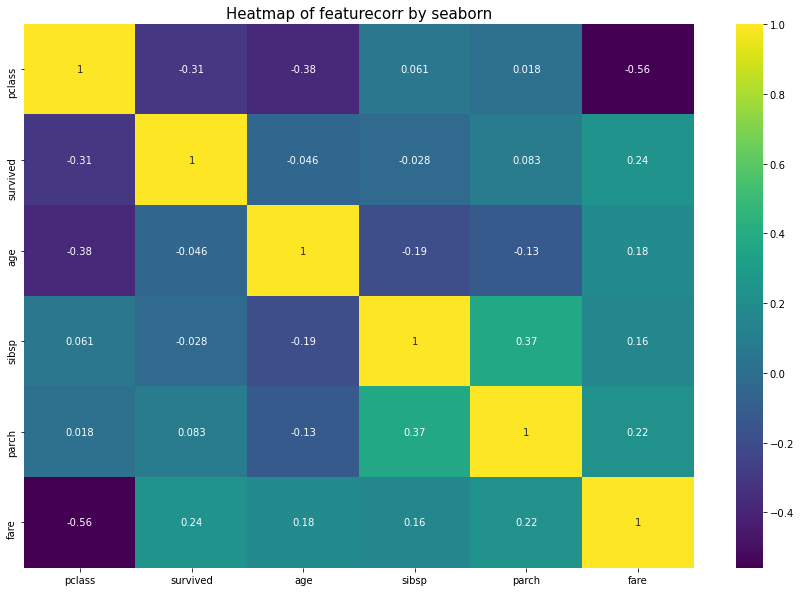

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# feature heatmap 그려보기
featurecorr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(featurecorr, cmap='viridis', annot=True)
#sns.heatmap(df_17corr, annot=True, fmt='f')
plt.title('Heatmap of featurecorr by seaborn', fontsize=15)

plt.show()

In [73]:
#시각화해서 색이 진한건 상관관계가 높다는 걸 알 수 있다. 

## 8-1. 시각화 - 성별에 따른 생존자 수


## 8-2 시각화 - 선실 등급에 따른 생존여부


## 9. X/y  분리


In [77]:
feature= df.drop(['survived'],axis=1)
label = df['survived']

In [79]:
feature

,pclass,gender,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C
1305,3,female,27.0000,1,0,14.4542,C
1306,3,male,26.5000,0,0,7.2250,C
1307,3,male,27.0000,0,0,7.2250,C


## 10. 데이터 변환(one hot encoding)


In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [1,6])], remainder = 'passthrough')

feature= ct.fit_transform(feature)

## 11. 훈련셋/평가셋 분리
 

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,label, test_size = 0.2, random_state=100)

print(X_train)
print('=====' *15)
print(y_train)


[[  0.       1.       1.     ...   0.       1.     247.5208]
 [  0.       1.       1.     ...   0.       0.      12.7375]
 [  0.       1.       0.     ...   0.       0.      13.    ]
 ...
 [  1.       0.       0.     ...   0.       2.      39.    ]
 [  1.       0.       0.     ...   2.       0.      25.7   ]
 [  0.       1.       1.     ...   1.       1.       7.2292]]
16     0
538    1
532    0
285    0
365    0
      ..
802    0
53     0
350    1
79     1
792    0
Name: survived, Length: 1047, dtype: int64


## 12. 모델 학습


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
model =RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [87]:
y_pred = RFC.predict(X_test)
print(y_pred)
print(np.array(y_test))

[0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1]
[0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0
 0 1 1 0 1 1 0 0 

## 13. 모델 성능 확인(evaluate)


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pres =  precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)

print(acc)
print(pres)
print(recall)

0.7977099236641222
0.7142857142857143
0.7368421052631579


## 13-1. confusion matrix 확인


In [89]:
from sklearn.model_selection import KFold, cross_val_score

data_kf = KFold(n_splits=5, shuffle=True, random_state=9)
score = cross_val_score(model, feature, label, cv=data_kf, scoring= 'accuracy')
print("5_fold_acc:", score)
print("Mean_Acc:", score.mean())

5_fold_acc: [0.79007634 0.76335878 0.76335878 0.77862595 0.78544061]
Mean_Acc: 0.7761720920710129


😊